# Machine Learning Project
### Spring 2024
## Predicting Credit Card Account Cancellations

<br>
<br>
<p align="center">
<img 
  src="./files/credit_cards.png" 
  alt="Car Accident" 
  width="500"
  height="350"
/>
</p>

<br>

## Introduction
This is an individual assignment and will be a chance for you to perform an applied data science project on a real data set. 

We will be working with the `credit_card_df` data frame in this project. This data set contains information on over 4,000 customers of a U.S. bank. The description of this data and the variables contained in it are provided below.

The objective of this project is to explore the factors that lead to customers canceling their credit card accounts and develop machine learning algorithms that will predict the likelihood of a customer canceling their account in the future.

## Credit Card Account Data

The `credit_card_df` data frame contains information on the customers of a large U.S. bank which provides a number of financial services including multiple credit card offerings. 

The bank is looking to see if it can determine the factors that lead to customers canceling their credit card account and whether it can predict if a customer will cancel their account in the future. 

To maintain profits, banks must maximize the number of customers with credit lines. It is also in their best interests for customers to carry large credit card balances from month-to-month to maximize revenue from interest charges.

The bank has experienced record levels of customers closing their credit accounts in the past couple of years and this is leading to declining revenue.

The bank's goal is to become better at identifying customers at risk of canceling their account to minimize financial losses.

Specifically, the broad questions that the company is trying to answer include:

<br>

- What are the factors that are associated with customers closing their credit card accounts?
- Is it possible to predict whether a customer will close their account? If so, how accurate are the predictions?
  - How many costly errors is the model expected to produce?
- Are there any actions or policies the company can implement to reduce the risk of losing their customers?

<br>

The data set contains a mixture of customer demographics and their financial behavior.

The outcome variable in this data is `customer_status`. This variable records whether a customer eventually closed their account and indicates a financial loss to the company.

**Note**: The outcome variable has been coded as a factor with 'closed_account' (**the positive class**) as the first level. This is the format that `tidymodels` expects for calculating model performance metrics. There is no need to recode this variable in your machine learning process.

<br>

### Data Definitions

| Variable            	     | Definition                                 	                | Data Type    |
|:---------------------------|:-------------------------------------------------------------|:-------------|
| customer_status            | Customer status (closed account or active)                   | Factor       |
| age                        | Customer age                                                 | Numeric      |
| dependents                 | Number of dependents in household                            | Numeric      |
| education                  | Customer education level                                     | Factor       |
| marital_status             | Marital status                                               | Factor       |
| employment_status          | Employment status                                            | Factor       |
| income                     | Annual income (US Dollars)                                   | Numeric      |
| card_type                  | Type of credit card                                          | Factor       |
| months_since_first_account | Months since first credit card account activated             | Numeric      |
| total_accounts             | Total accounts (credit checking and savings)                 | Numeric      |
| months_inactive_last_year  | Months without credit card activity last year                | Numeric      |
| contacted_last_year        | Number of times contacted last year by sales representatives | Numeric      |
| credit_limit               | Current credit limit                                         | Numeric      |
| utilization_ratio          | Average monthly balance to credit limit                      | Numeric      |
| spend_ratio_q4_q1          | Ratio of total Q4 to Q1 spending last year                   | Numeric      |
| total_spend_last_year      | Total amount charged last year                               | Numeric      |
| transactions_last_year     | Number of transactions last year                             | Numeric      |
| transaction_ratio_q4_q1    | Ratio of total Q4 to Q1 transactions last year               | Numeric      |

In [267]:
# Load data
library(tidyverse)

credit_card_df <- readRDS(url('https://gmubusinessanalytics.netlify.app/data/credit_card_df.rds'))

In [268]:
# View data
credit_card_df

customer_status,age,dependents,education,marital_status,employment_status,income,card_type,months_since_first_account,total_accounts,months_inactive_last_year,contacted_last_year,credit_limit,utilization_ratio,spend_ratio_q4_q1,total_spend_last_year,transactions_last_year,transaction_ratio_q4_q1
<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
closed_account,46,3,masters,married,self_employed,67807,blue,36,2,3,4,4267,0.000,0.862,1067,23,0.769
closed_account,46,3,associates,married,self_employed,51785,blue,34,2,3,2,8583,0.000,0.358,1794,31,0.292
closed_account,44,4,masters,single,part_time,105643,gold,36,5,3,2,2367,0.678,0.956,4506,59,0.639
closed_account,62,1,masters,single,part_time,34138,gold,56,1,2,1,3109,0.000,1.054,5470,72,0.674
closed_account,38,1,masters,married,full_time,36264,blue,20,2,2,3,1621,0.358,0.421,1893,41,0.171
closed_account,43,3,associates,single,part_time,84234,blue,30,3,2,4,11336,0.000,0.691,1809,39,0.345
active,43,2,masters,married,full_time,35379,blue,35,3,1,3,4092,0.152,0.775,5001,88,0.492
closed_account,39,3,associates,married,part_time,67047,blue,29,4,3,4,2187,0.000,0.467,2031,40,0.333
active,54,1,masters,single,full_time,35903,gold,47,6,3,4,12873,0.000,1.005,3170,70,0.842


# Exploratory Data Analysis (50 Points)

In this section, you must think of at least 5 relevant questions that explore the relationship between `customer_status` and the other variables in the `credit_card_df` data set. The goal of your analysis should be discovering which variables drive the differences between customers who do and do not close their account.

You must answer each question and provide supporting data summaries with either a summary data frame (using `dplyr`/`tidyr`) or a plot (using `ggplot`) or both.

In total, you must have a minimum of 3 plots (created with `ggplot`) and 3 summary data frames (created with `dplyr`) for the exploratory data analysis section. Among the plots you produce, you must have at least 3 different types (ex. box plot, bar chart, histogram, scatter plot, etc...)

Each question must be answered with **supporting evidence** from your tables and plots.

See the example question below.

### Sample Question
The sample below is from a previous semester where students analyzed a dataset, **employee_df**, with information on employees of a company and whether they decided to leave the company for another job.

The question, `R` code, and answer are examples of the correct style and language that you should use for your work.

### Question

*Is there a relationship between employees leaving the company and their current salary?*

**Answer**: Yes, the data indicates that employees who leave the company tend to have lower salaries when compared to employees who do not. Among the 237 employees that left the company, the average salary was \$76,625. This is over \$20,000 less than the average salary of employees who did not leave the company.

Among the employees *who did not leave the company*, only 10% have a salary that is less than or equal to \$60,000. When looking at employees who did leave the company, this increases to 34%.

### Supporting Table and Visualization

Note - the sample code and output below is an image, not code cells

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_table.jpg"
  width="650"
  height="auto"
/>
</p>

<br>
<br>
<br>

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_plot.jpg"
  width="650"
  height="auto"
/>
</p>


## Question 1


**Question**:

Is there a difference in annual income between customers who close their accounts and those who remain active?

**Answer**:

The box plot below describes the distribution of annual incomes for customers who have closed their accounts versus those who remain active. 

From the plot, it appears that:
- The median annual income is indicated by the horizontal line within each box. Both medians appear to be quite close, suggesting that the central tendency of income is similar for both groups.
- The range of incomes, as shown by the boxes (which represent the interquartile range), seems to be roughly similar for both groups as well.
- Outliers are represented by the individual dots outside the upper whiskers of the boxes. It appears that both groups have outliers, but the 'closed_account' group shows several outliers with higher income values than the typical customer within the same group.


From this plot, while the overall income distribution seems similar between the two groups, the 'closed_account' group has a noticeable presence of higher-income outliers. This could indicate that higher-income customers are closing their accounts, or it may suggest variability in the financial behaviors or needs of higher-income customers that could be influencing their decision to close their accounts.

## Supporting Analysis

In [269]:
# This code adjusts the figure output size in the notebook
options(repr.plot.width=11, repr.plot.height=8)

In [270]:
library(dplyr)
library(ggplot2)

In [271]:
#summary
incomeSummary<-credit_card_df%>%
group_by(customer_status)%>%
summarise(averageIncome=mean(income))

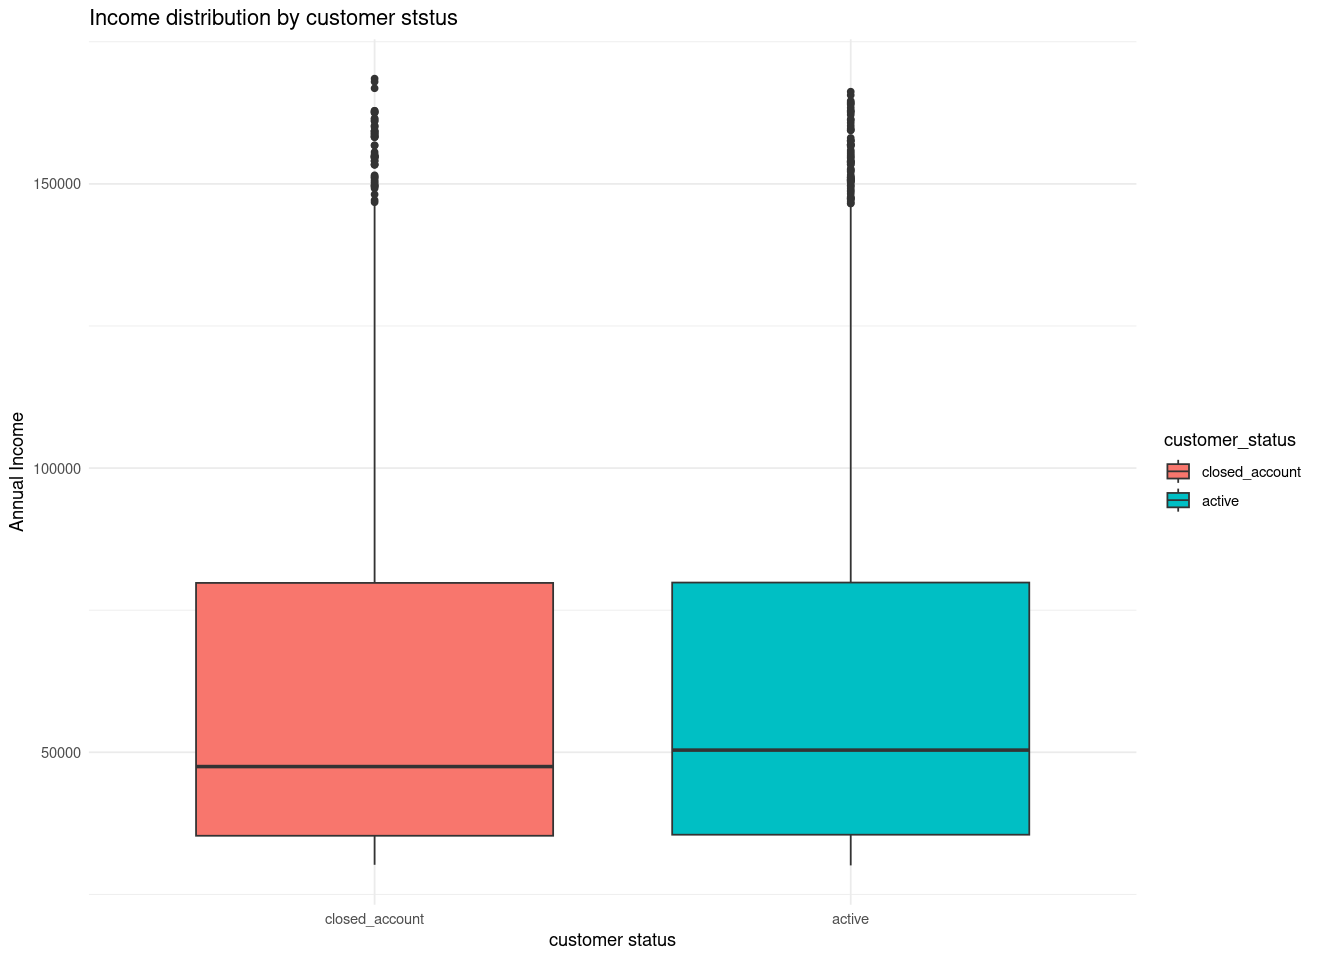

In [272]:
#plot
ggplot(credit_card_df,aes(x=customer_status, y=income, fill = customer_status))+
geom_boxplot()+
labs(title='Income distribution by customer ststus',x='customer status',y='Annual Income')+
theme_minimal()

## Question 2


**Question**:
How does credit card utilization ratio affect the likelihood of account closure?


**Answer**:
The density plot tells the difference between customers who have closed their accounts (in red) and those who remain active (in blue), based on their credit card utilization ratio.

From the plot, we can observe the following:

- The red area, representing customers who have closed their accounts, has a peak at a utilization ratio of 0. This suggests that many customers who closed their accounts had a low or zero credit card utilization ratio.
- The blue area, representing active customers, shows a broader spread across utilization ratios, suggesting that active customers have a wider range of utilization behaviors.
- The red area overtakes the blue in the lower utilization ratio area, then around the 0.1 to 0.2 mark, the blue area becomes dominant and continues to be higher across the rest of the distribution.

These observations imply that a lower utilization ratio is more common among customers who closed their accounts than among those who remained active. This could indicate that customers who are not using their credit cards or are using a small portion of their available credit are more likely to close their accounts.

This pattern could be due to various reasons, such as customers finding less value in their credit cards, preferring other cards, or consolidating their credit usage to fewer cards. On the other hand, active customers show a more varied utilization pattern, which might indicate engagement and satisfaction with their credit card services.

In [273]:
#summary 
utilizationSummary <- credit_card_df %>%
  group_by(customer_status) %>%
  summarise(Average_Utilization_Ratio = mean(utilization_ratio))

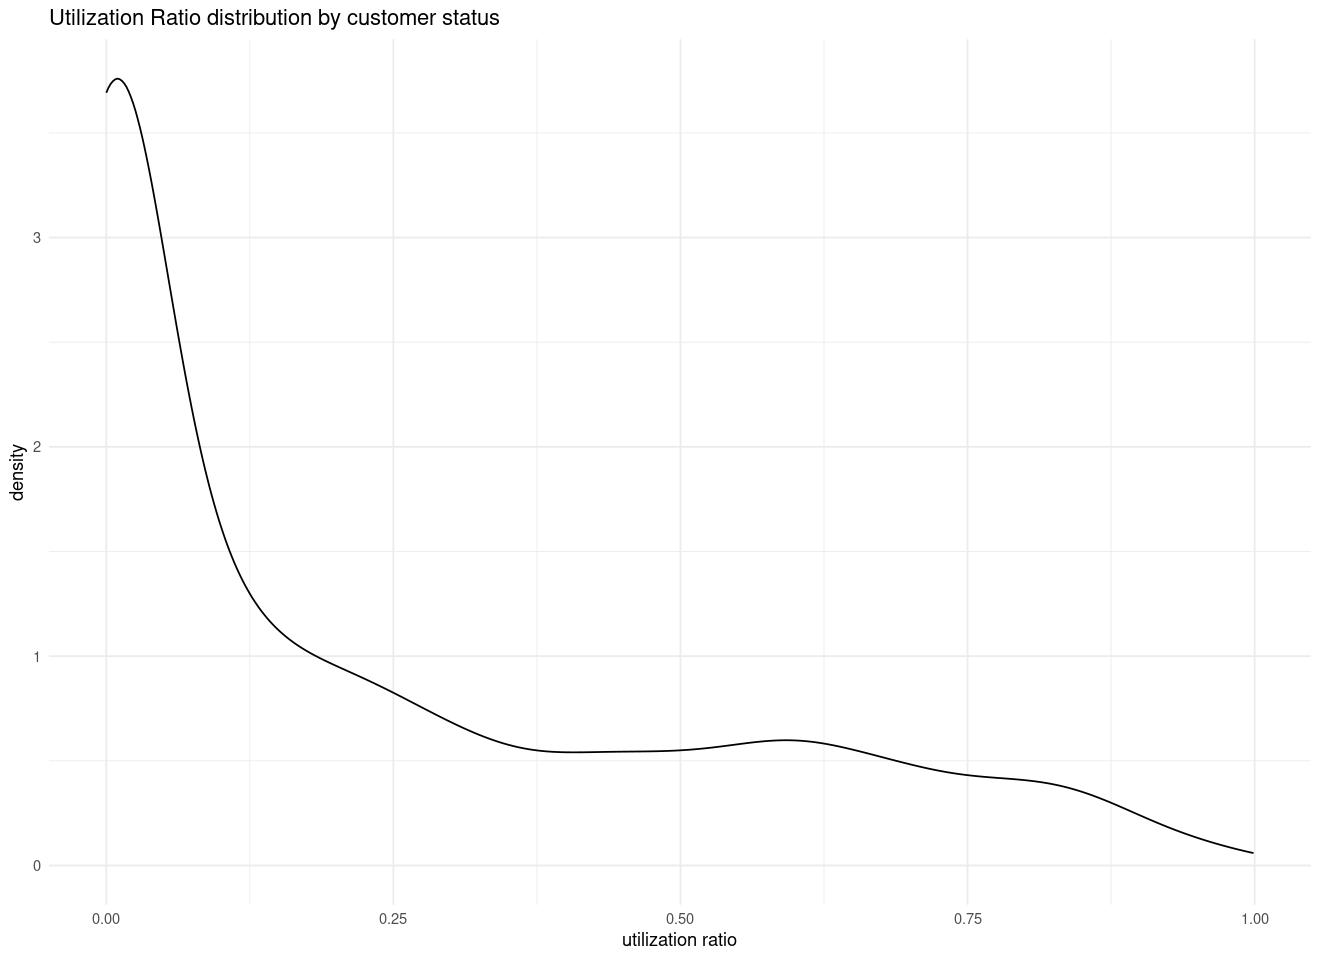

In [274]:
ggplot(credit_card_df,aes(x=utilization_ratio))+
geom_density(alpha=0.5)+
labs(title="Utilization Ratio distribution by customer status",x="utilization ratio",y="density")+

theme_minimal()

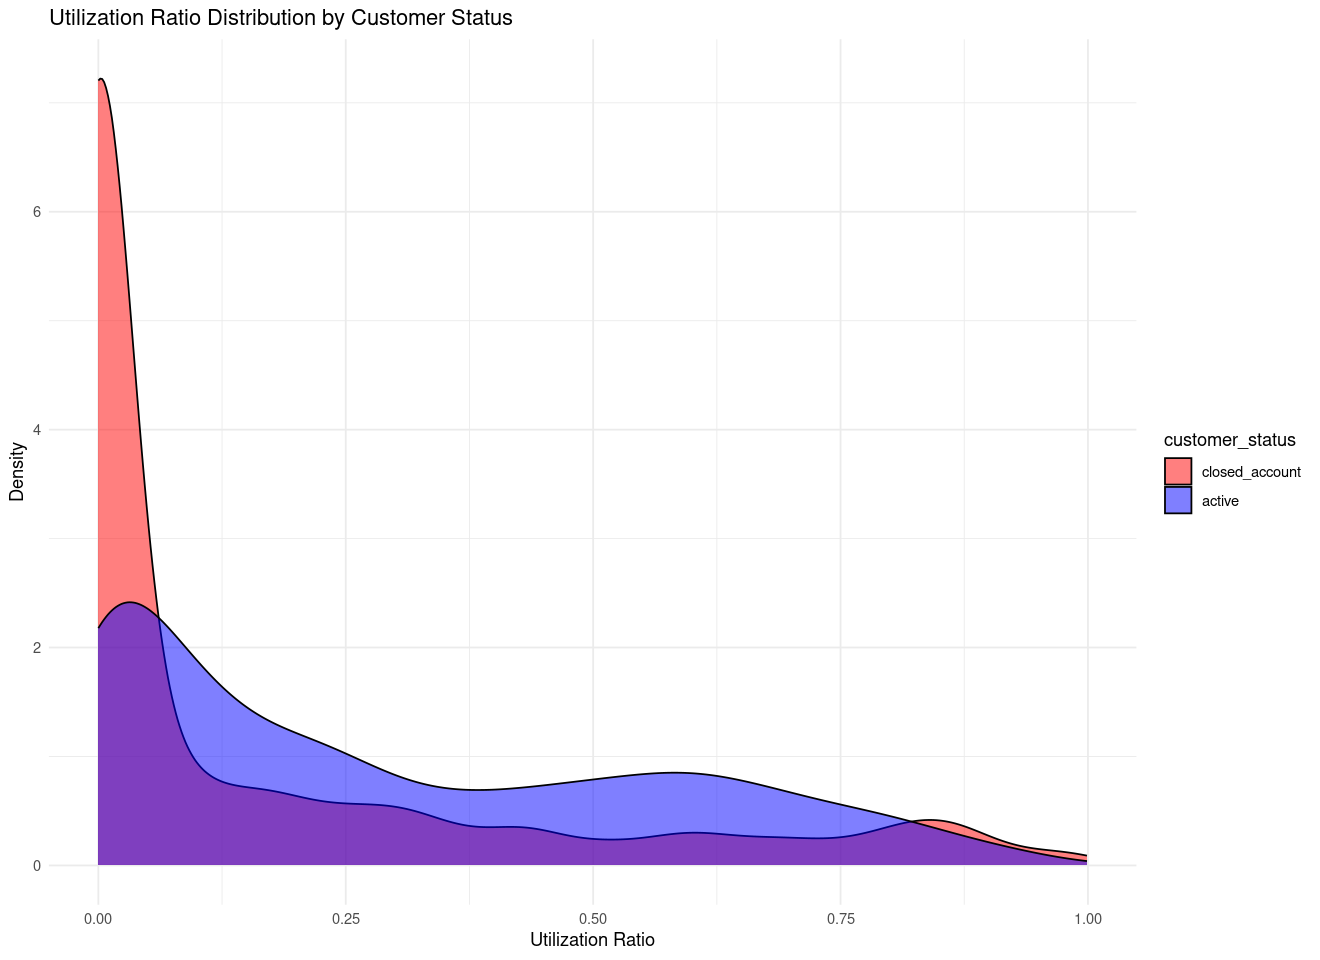

In [275]:
ggplot(credit_card_df, aes(x = utilization_ratio, fill = customer_status)) +
  geom_density(alpha = 0.5) +
  labs(title = "Utilization Ratio Distribution by Customer Status",
       x = "Utilization Ratio", y = "Density") +
  scale_fill_manual(values = c("closed_account" = "red", "active" = "blue")) +
  theme_minimal()


## Supporting Analysis


## Question 3


**Question**:
Does marital status influence account closure rates?


**Answer**:
- Single: The number of active accounts appears slightly higher than the number of closed accounts. This suggests that single customers tend to keep their accounts active, though there's still a considerable number of closures.
- Married: The number of active accounts is also higher than that of closed accounts, which is consistent with the pattern observed in single customers. However, the difference between active and closed accounts for married customers appears more pronounced compared to single customers.
- Divorced: The counts of active and closed accounts for divorced customers are much lower than those for single and married customers. However, the proportion of closed accounts to active accounts seems to be more significant for divorced individuals than for the other two groups.

The visual evidence indicates that marital status might have an association with credit card account closure rates, especially noting the higher proportion of account closures among divorced individuals. However, the chart does not provide statistical validation of the differences observed.

## Supporting Analysis


In [277]:
#summary
martialStatusSummary<-credit_card_df %>%
group_by(marital_status,customer_status)%>%
summarise(count=n())

`summarise()` has grouped output by 'marital_status'. You can override using
the `.groups` argument.


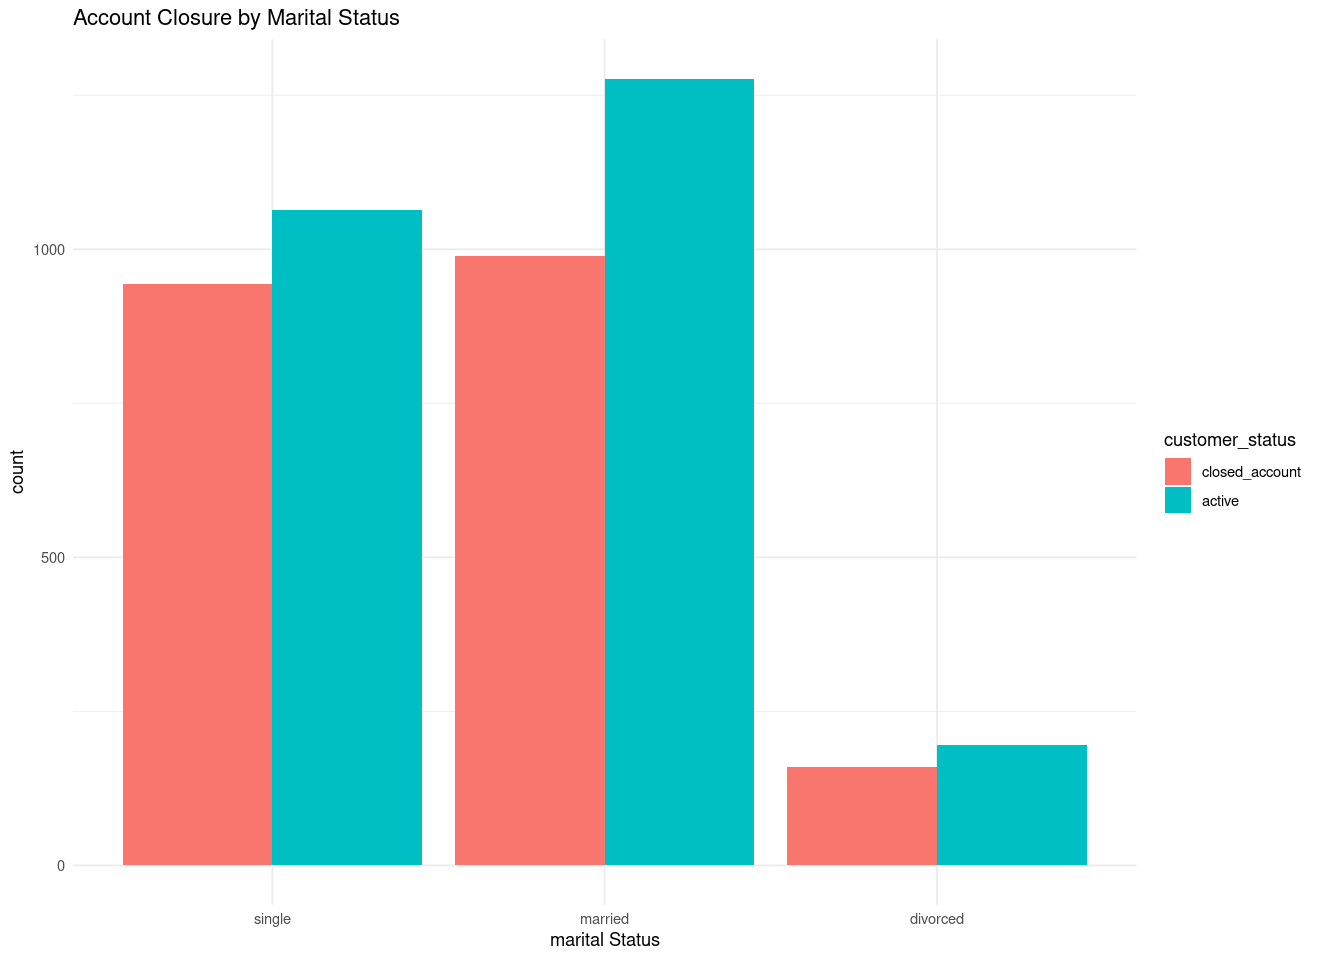

In [278]:
#plot
ggplot(martialStatusSummary,aes(x=marital_status,y= count,fill=customer_status))+
geom_bar(stat="identity",position=position_dodge())+
labs(title="Account Closure by Marital Status",x="marital Status",y="count")+
theme_minimal()

## Question 4


**Question**:
Are there differences in the number of months inactive last year between customers who closed their accounts and those who did not?


**Answer**:
- The distribution for customers who closed their accounts (red) tends to have a wider area around the higher number of inactive months, suggesting a tendency towards longer periods of inactivity.
- For active customers (blue), the distribution is more centered with a narrower spread, indicating that active customers generally have fewer inactive months.
- Both distributions show points of constriction, which suggests that there are common specific periods of inactivity that are frequent among the customers.

These observations suggest that there is a difference in the number of months of inactivity between customers who closed their accounts and those who did not. Customers who have closed their accounts show a pattern of longer inactivity compared to those who have active accounts. This could indicate that inactivity is a potential indicator or predictor of account closure.

## Supporting Analysis


In [279]:
#summary
inactiveMonthsSummary<- credit_card_df %>%
group_by(customer_status) %>%
summarise(AverageMOnthsInactive=mean(months_inactive_last_year))

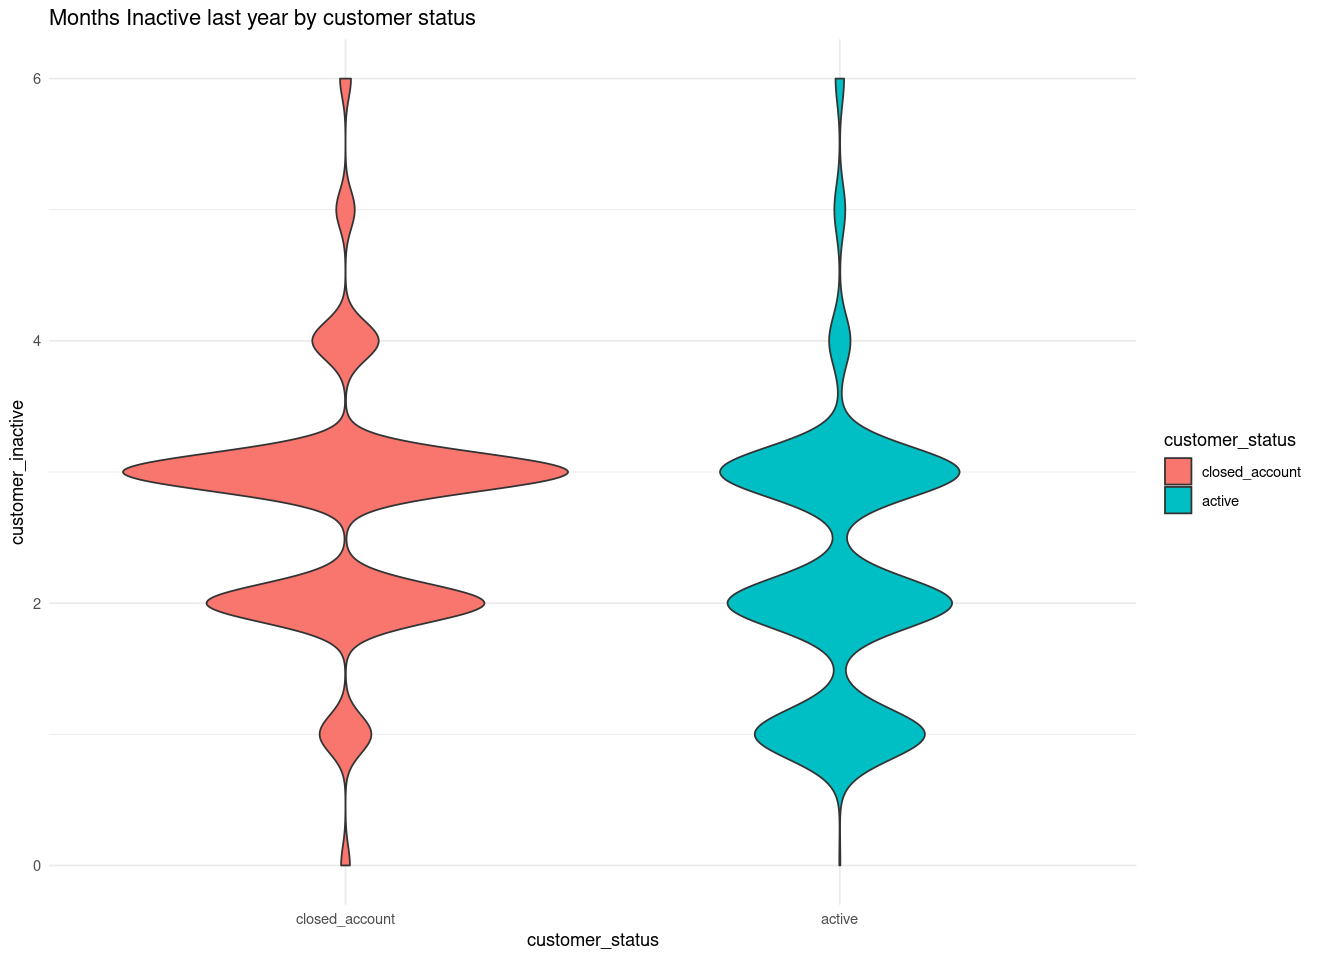

In [280]:
#plot
ggplot(credit_card_df,aes(x=customer_status,y=months_inactive_last_year, fill=customer_status))+
geom_violin()+
labs(title="Months Inactive last year by customer status",x='customer_status',y='customer_inactive')+
theme_minimal()

## Question 5


**Question**:
How does the type of credit card relate to account closure?


**Answer**:
- Blue Card Type: The proportion of closed accounts is slightly higher than that of active accounts. This could indicate that customers with blue cards are more likely to close their accounts compared to other card types.
- Silver Card Type: The proportion of active accounts is significantly higher than that of closed accounts. This suggests that customers with silver cards are more likely to keep their accounts active.
- Gold Card Type: The proportions of closed and active accounts are almost equal,Gold cardholders, therefore, are more likely to keep their accounts open.

These observations suggest that there is a relationship between the type of credit card and account closure rates. The reasons behind this could be manifold, including the perceived value of the card, the benefits it offers, or the customer segments these card types are marketed to.



## Supporting Analysis


In [281]:
#summary
cardTypeSummary<-credit_card_df %>%
group_by(card_type,customer_status)%>%
summarize(Count=n())

`summarise()` has grouped output by 'card_type'. You can override using the
`.groups` argument.


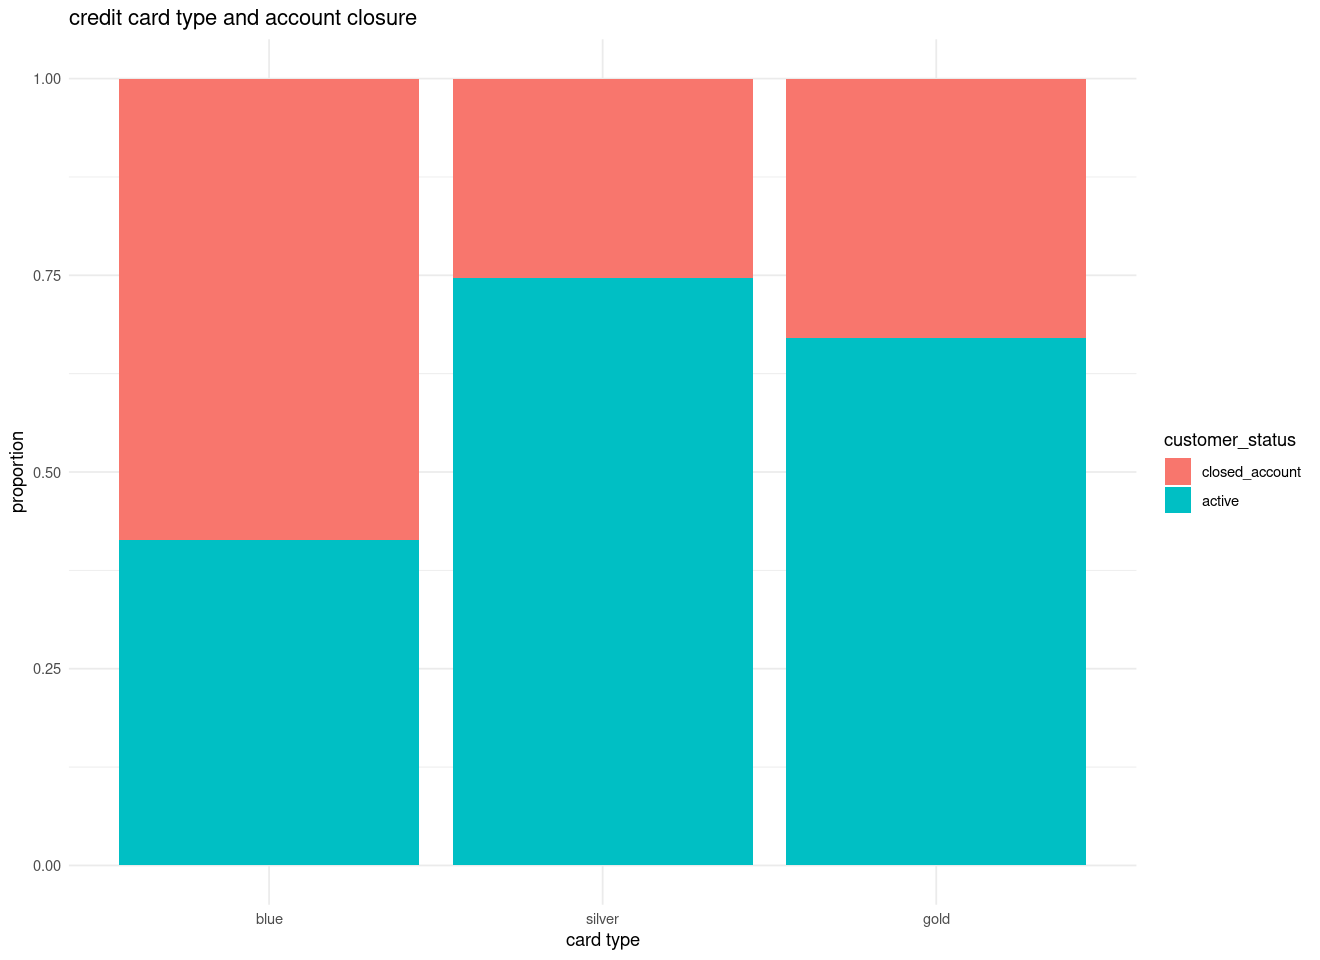

In [282]:
ggplot(cardTypeSummary,aes(x=card_type,y=Count,fill=customer_status))+
geom_bar(stat="identity",position="fill")+
labs(title="credit card type and account closure",x="card type",y="proportion")+
theme_minimal()

# Machine Learning Modeling (75 Points)
In this section of the project, you will fit **three classification algorithms** to predict the outcome variable,`customer_status`.

You must follow the machine learning steps below. 

The data splitting and feature engineering steps should only be done once so that your models are using the same data and feature engineering steps for training.

1. Split the `credit_card_df` data into a training and test set (remember to set your seed)
2. Specify a feature engineering pipeline with the `recipes` package
    - You can include steps such as skewness transformation, dummy variable encoding or any other steps you find appropriate
3. Specify a `parsnip` model object
    - You may choose from the following classification algorithms:
      - Logistic Regression
      - LDA
      - QDA
      - KNN
      - Decision Tree
      - Random Forest
4. Package your recipe and model into a workflow
5. Fit your workflow to the training data
    - If your model has hyperparameters:
      - Split the training data into 5 folds for 5-fold cross validation using `vfold_cv` (remember to set your seed)
      - Perform hyperparamter tuning with a random grid search using the `grid_random()` function
      - Refer to the following tutorial for an example - [Random Grid Search](https://gmubusinessanalytics.netlify.app/lesson-08-r-tutorial.html#Hyperparameter_Tuning14)
      - Hyperparameter tuning can take a significant amount of computing time. Be careful not to set the `size` argument of `grid_random()` too large. I recommend `size` = 10 or smaller.
      - Select the best model with `select_best()` and finalize your workflow
6. Evaluate model performance on the test set by plotting an ROC curve using `autoplot()` and calculating the area under the ROC curve on your test data

In [283]:
# Run this R code to install ML packages that you might need (Will take about 1 minute)
install.packages('vip')

Installing vip [0.4.1] ...
	OK [linked cache]


## Data Resampling
First split your data into training and test sets. If performing hyperparameter tuning, also create folds from your training data

In [284]:
library(tidymodels)

In [285]:
# Splitting data into 70% training and 30% test

dataSplit <- initial_split(credit_card_df, prop = 0.8, strata =customer_status)
# Extract the training and test sets
trainingData <- training(dataSplit)
testData <- testing(dataSplit)
#checking the number of rows
nrow(trainingData)
nrow(testData)

[1] 3701

[1] 926

## Feature Engineering Pipeline
Specify your feature engineering pipeline with the `recipes` package. You will use the pipeline when you create your modeling workflows below for each of your models.

In [287]:
credit_card_df

customer_status,age,dependents,education,marital_status,employment_status,income,card_type,months_since_first_account,total_accounts,months_inactive_last_year,contacted_last_year,credit_limit,utilization_ratio,spend_ratio_q4_q1,total_spend_last_year,transactions_last_year,transaction_ratio_q4_q1
<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
closed_account,46,3,masters,married,self_employed,67807,blue,36,2,3,4,4267,0.000,0.862,1067,23,0.769
closed_account,46,3,associates,married,self_employed,51785,blue,34,2,3,2,8583,0.000,0.358,1794,31,0.292
closed_account,44,4,masters,single,part_time,105643,gold,36,5,3,2,2367,0.678,0.956,4506,59,0.639
closed_account,62,1,masters,single,part_time,34138,gold,56,1,2,1,3109,0.000,1.054,5470,72,0.674
closed_account,38,1,masters,married,full_time,36264,blue,20,2,2,3,1621,0.358,0.421,1893,41,0.171
closed_account,43,3,associates,single,part_time,84234,blue,30,3,2,4,11336,0.000,0.691,1809,39,0.345
active,43,2,masters,married,full_time,35379,blue,35,3,1,3,4092,0.152,0.775,5001,88,0.492
closed_account,39,3,associates,married,part_time,67047,blue,29,4,3,4,2187,0.000,0.467,2031,40,0.333
active,54,1,masters,single,full_time,35903,gold,47,6,3,4,12873,0.000,1.005,3170,70,0.842


In [288]:
recipeData <- recipe(customer_status ~ ., data = trainingData) %>%
step_normalize(all_numeric(), -all_outcomes()) %>%
step_dummy(all_nominal(), -all_outcomes())



In [289]:
recipeData %>%
prep(training=trainingData)%>%
bake(new_data=NULL)

age,dependents,income,months_since_first_account,total_accounts,months_inactive_last_year,contacted_last_year,credit_limit,utilization_ratio,spend_ratio_q4_q1,⋯,customer_status,education_bachelors,education_masters,education_doctorate,marital_status_married,marital_status_divorced,employment_status_part_time,employment_status_self_employed,card_type_silver,card_type_gold
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.42518180,-0.2950308,-0.7988616,-0.13602492,-0.4158735,-1.4643320,0.3023556,-0.48924323,-0.28366480,0.17824408,⋯,active,0,1,0,1,0,0,0,0,0
-0.04286940,1.2363983,0.2763160,0.62809586,0.2172601,-0.4597921,-1.4738635,-0.34779361,0.74636611,-0.30268674,⋯,active,0,1,0,0,1,0,0,0,1
-0.29774434,0.4706838,-0.7392912,-0.77279225,1.4835272,0.5447478,0.3023556,-0.44079267,0.81601232,-0.14237646,⋯,active,1,0,0,0,0,0,0,0,0
-0.93493168,0.4706838,1.1605179,-0.39073185,1.4835272,3.5583674,1.1904651,1.08133540,-0.68321415,-0.08741294,⋯,active,0,1,0,1,0,0,0,0,0
0.08456807,0.4706838,0.2051047,-0.00867146,-1.0490070,0.5447478,-1.4738635,0.35912936,-0.11871323,0.48512375,⋯,active,0,0,0,1,0,0,0,0,1
0.72175541,1.2363983,-0.7687795,1.51957012,0.8503937,2.5538276,-0.5857540,-0.77777880,1.12392192,-0.38513202,⋯,active,0,0,0,0,1,0,0,0,0
-0.42518180,1.2363983,-0.7353119,-0.00867146,1.4835272,2.5538276,-1.4738635,-0.63166838,2.48019037,0.27443025,⋯,active,0,1,0,1,0,0,1,0,1
-0.68005674,0.4706838,-0.8050384,-0.64543878,-1.0490070,-0.4597921,-0.5857540,-0.48989358,0.92964563,0.17824408,⋯,active,1,0,0,1,0,0,0,0,0
-1.06236914,-1.0607453,1.2290269,-1.40955957,0.2172601,-0.4597921,1.1904651,-0.05069519,-0.84083454,-0.64162846,⋯,active,0,1,0,0,0,0,0,1,0


## Model 1 Training

In [290]:
# Specifying a logistic regression model
logisticModel <- logistic_reg() %>%
# Set the engine
set_engine('glm') %>%
# Set the mode
set_mode('classification')
# Printing the model specification
logisticModel


Logistic Regression Model Specification (classification)

Computational engine: glm 


In [291]:
#workflow function
dataWorkflw<- workflow()%>%
add_model(logisticModel)%>%
add_recipe(recipeData)


In [292]:
# Fit to training data
logisticFit <- dataWorkflw %>%
fit(data = trainingData)
logisticFit


dataTrainModel<- logisticFit%>%
pull_workflow_fit()

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: logistic_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_normalize()
• step_dummy()

── Model ───────────────────────────────────────────────────────────────────────

Call:  stats::glm(formula = ..y ~ ., family = stats::binomial, data = data)

Coefficients:
                    (Intercept)                              age  
                      -0.138934                         0.060606  
                     dependents                           income  
                      -0.167442                         0.079213  
     months_since_first_account                   total_accounts  
                       0.098535                         0.609555  
      months_inactive_last_year              contacted_last_year  
                      -0.543696                        -0.453067  
                   credit_limit   

customer_status,.pred_class,.pred_closed_account,.pred_active
<fct>,<fct>,<dbl>,<dbl>
active,active,0.025711901,0.974288099
closed_account,closed_account,0.968045255,0.031954745
closed_account,closed_account,0.921427965,0.078572035
active,active,0.010113077,0.989886923
closed_account,closed_account,0.500721684,0.499278316
active,active,0.119988621,0.880011379
active,active,0.121825363,0.878174637
active,active,0.003077414,0.996922586
closed_account,closed_account,0.943123441,0.056876559


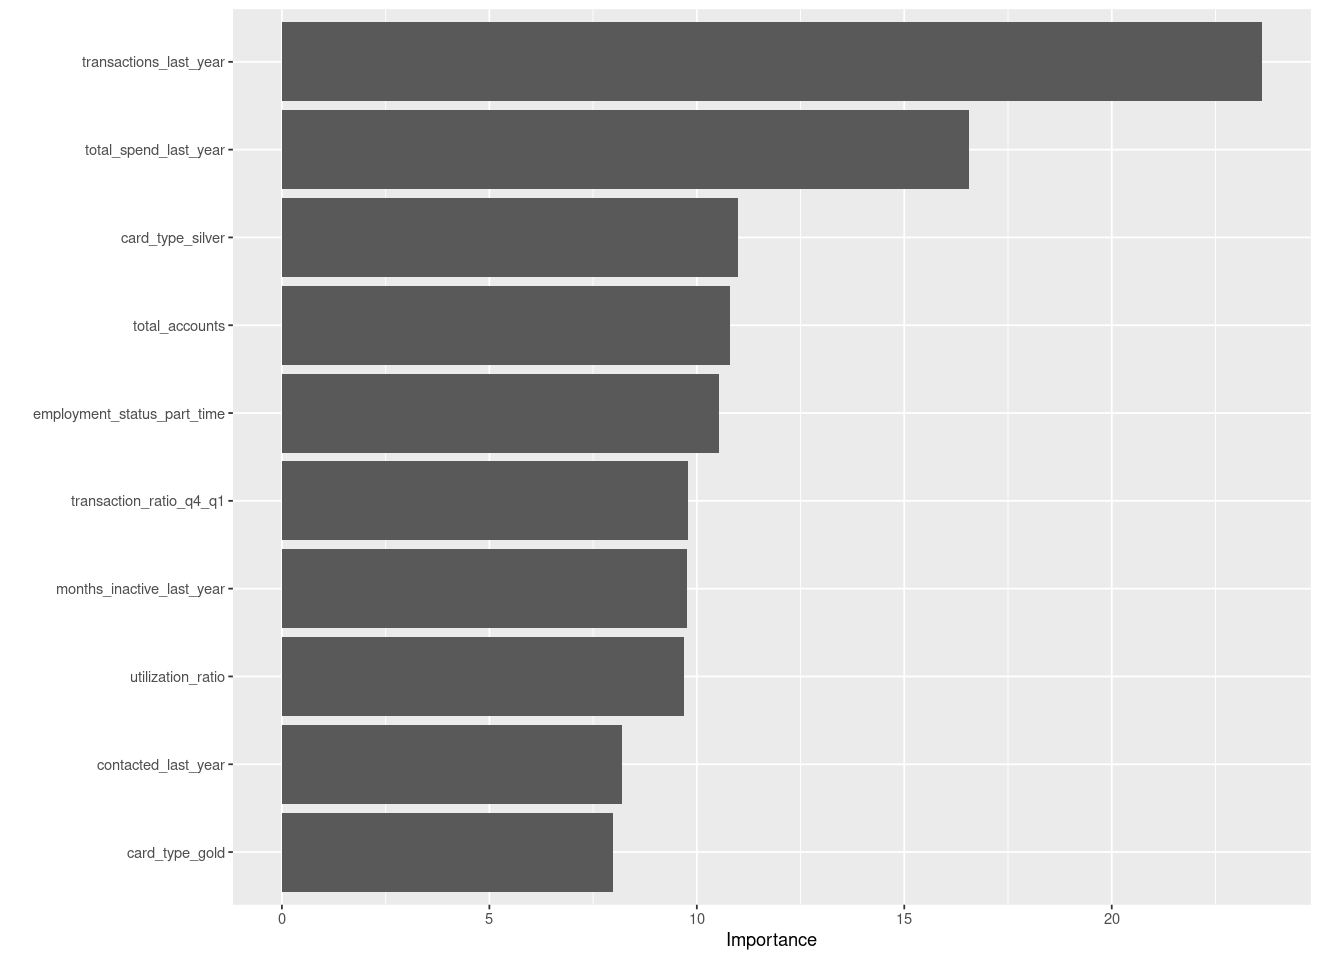

In [293]:
library(vip)
vip(dataTrainModel)
# Predict outcome categories
classPred <- predict(logisticFit, new_data = testData,
type = 'class')
# Obtaining estimated probabilities for each outcome value
probPred <- predict(logisticFit, new_data = testData,
type = 'prob')
# Combining test set results
credfitDataResults <- testData %>%
select(customer_status) %>%
bind_cols(classPred, probPred)
credfitDataResults


## Model 1 Performance Evaluation

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
f_meas,binary,0.8524203


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8650108
sens,binary,0.8615752
spec,binary,0.8678501


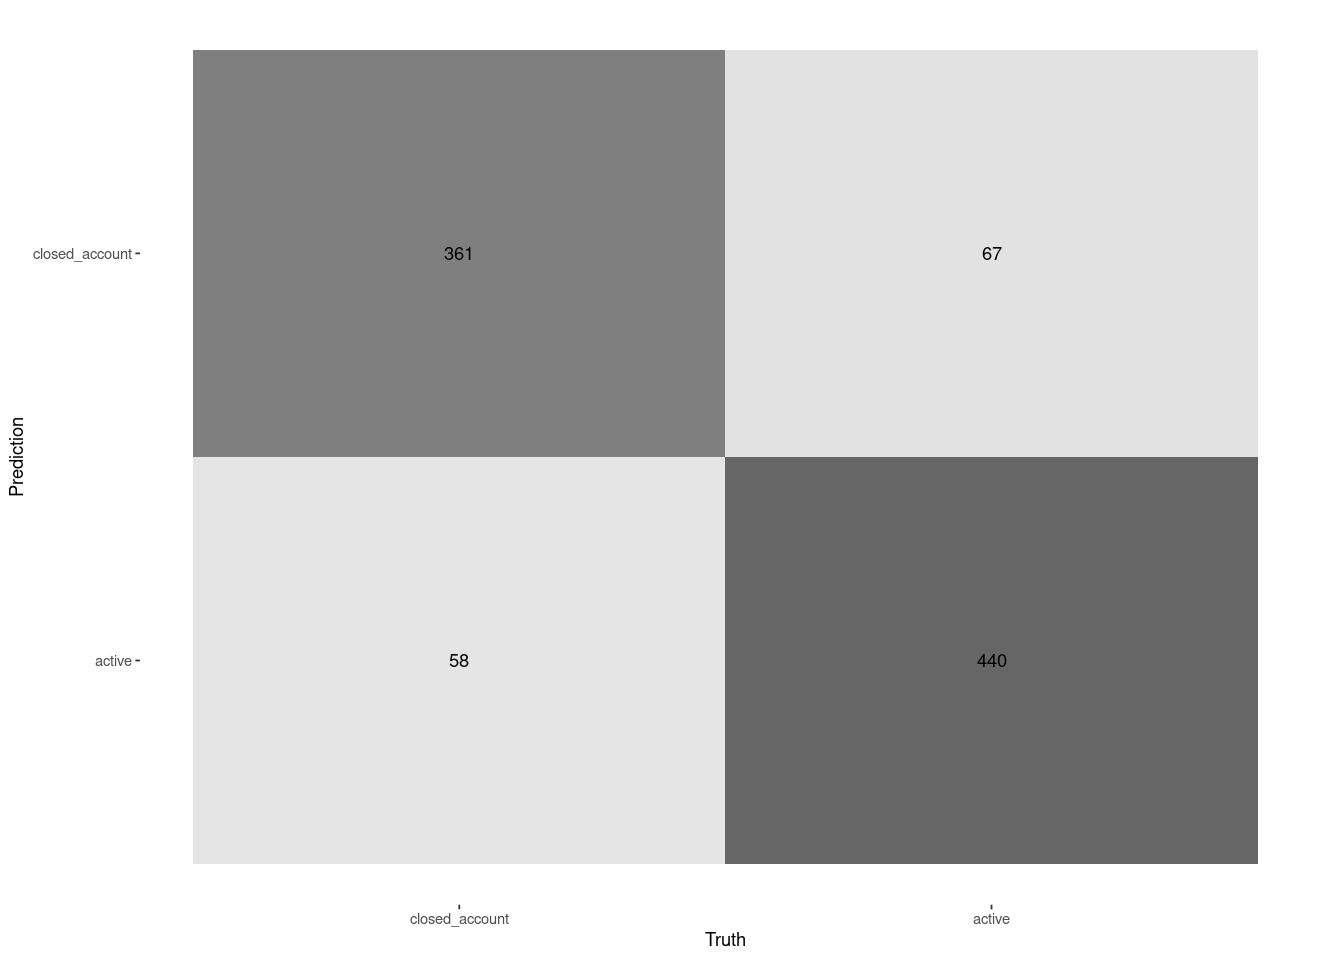

In [294]:
# Calculating the confusion matrix
conf_mat(credfitDataResults, truth = customer_status,
estimate = .pred_class)%>%
autoplot(type = "heatmap")
#f1 score
f_meas(credfitDataResults, truth = customer_status, estimate = .pred_class)
# Create a custom metric function
creditmetrics <- metric_set(accuracy, sens, spec)
# Calculate metrics using model results tibble
creditmetrics(credfitDataResults, truth = customer_status,
estimate = .pred_class)


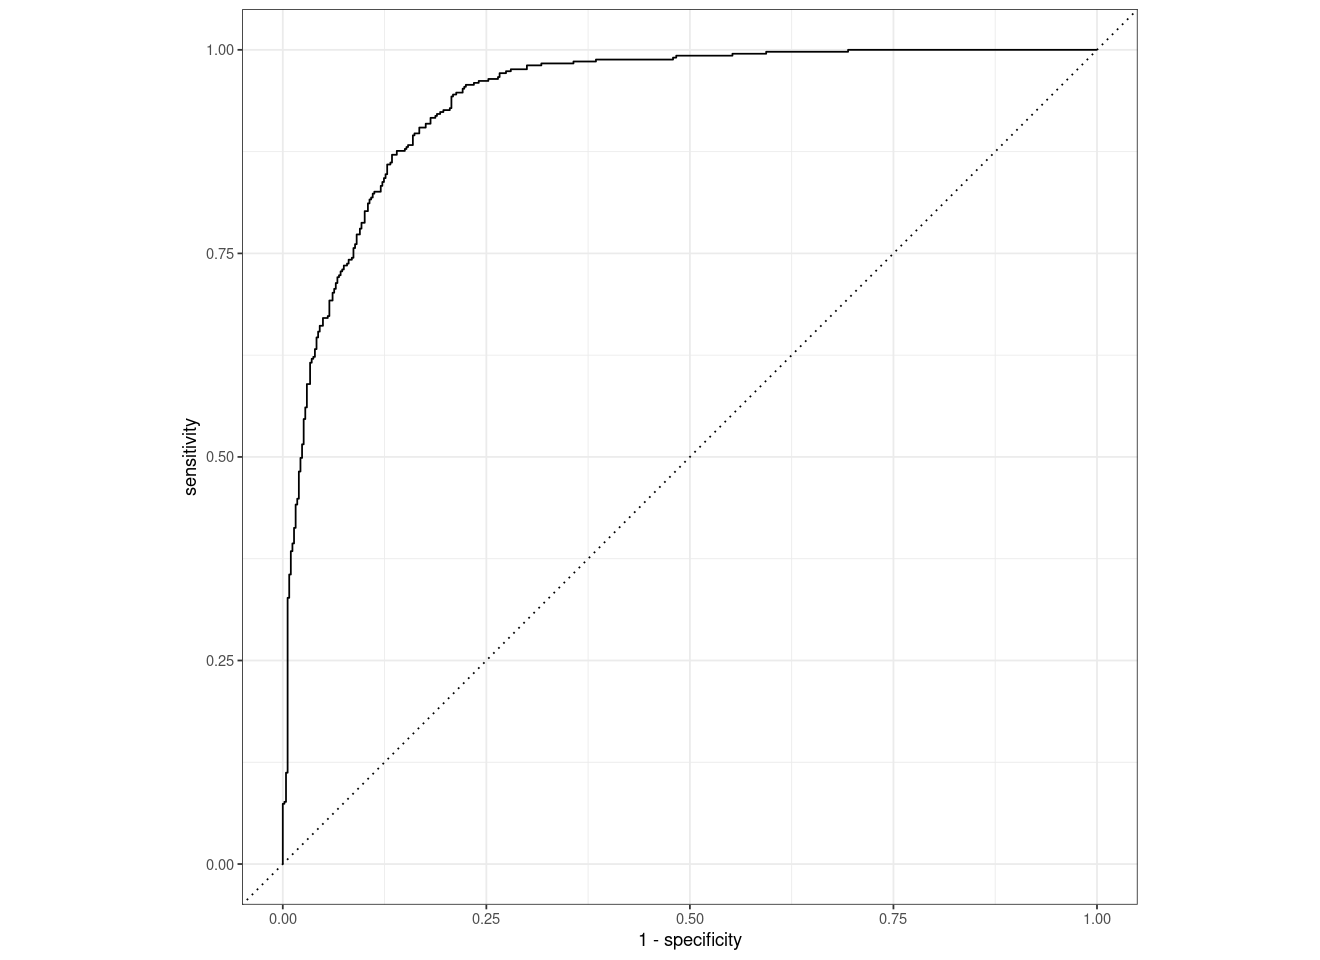

In [295]:
credfitDataResults %>%
roc_curve(truth = customer_status, .pred_closed_account) %>%
autoplot()

In [296]:
last_fit<- dataWorkflw%>%
last_fit(split = dataSplit, metrics = creditmetrics)
last_fit%>%
collect_metrics()
last_fit_results<- last_fit%>%
collect_predictions()
#printing the last fit results
last_fit_results

.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.8650108,Preprocessor1_Model1
sens,binary,0.8615752,Preprocessor1_Model1
spec,binary,0.8678501,Preprocessor1_Model1


id,.pred_class,.row,customer_status,.config
<chr>,<fct>,<int>,<fct>,<chr>
train/test split,active,9,active,Preprocessor1_Model1
train/test split,closed_account,13,closed_account,Preprocessor1_Model1
train/test split,closed_account,15,closed_account,Preprocessor1_Model1
train/test split,active,18,active,Preprocessor1_Model1
train/test split,closed_account,28,closed_account,Preprocessor1_Model1
train/test split,active,35,active,Preprocessor1_Model1
train/test split,active,42,active,Preprocessor1_Model1
train/test split,active,43,active,Preprocessor1_Model1
train/test split,closed_account,48,closed_account,Preprocessor1_Model1


## Model 2 Training

In [297]:
library(rpart.plot)

In [298]:
splitCreditDf<- initial_split(credit_card_df, prop= 0.8,strata=customer_status)
trainingCreditDf<- splitCreditDf%>%
training()
testCreditDf<- splitCreditDf%>%
testing()
creditFolds <- vfold_cv(trainingCreditDf, v=5)

In [299]:
recipeCrdit<- recipe(customer_status ~ . ,data = trainingCreditDf)%>%
step_YeoJohnson(all_numeric(), -all_outcomes())%>%
step_normalize(all_numeric(), -all_outcomes())%>%
step_dummy(all_nominal(),-all_outcomes())
recipeCrdit%>%
prep(training=trainingCreditDf)%>%
bake(new_data=NULL)

age,dependents,income,months_since_first_account,total_accounts,months_inactive_last_year,contacted_last_year,credit_limit,utilization_ratio,spend_ratio_q4_q1,⋯,customer_status,education_bachelors,education_masters,education_doctorate,marital_status_married,marital_status_divorced,employment_status_part_time,employment_status_self_employed,card_type_silver,card_type_gold
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.43648757,-0.2847315,-0.98176711,-0.16273744,-0.3857308,-1.5780012,0.3239207,-0.17199146,0.05965909,0.24465688,⋯,active,0,1,0,1,0,0,0,0,0
0.97548908,-1.0660103,-0.93385411,1.42368447,1.4559651,0.5936825,1.1963644,0.98320283,-1.03549216,1.20409026,⋯,active,0,1,0,0,0,0,0,0,1
-0.05433826,1.2495121,0.73574308,0.61656685,0.2469872,-0.4075992,-1.4787857,0.14118261,1.05217204,-0.24036186,⋯,active,0,1,0,0,1,0,0,0,1
-0.94224538,0.4861943,1.25994060,-0.41575594,1.4559651,3.0519341,1.1963644,1.28261540,-0.65958460,-0.01918967,⋯,active,0,1,0,1,0,0,0,0,0
0.07355550,0.4861943,0.67512116,-0.03491973,-1.0446315,0.5936825,-1.4787857,0.91647010,0.28424430,0.53777890,⋯,active,0,0,0,1,0,0,0,0,1
0.71664353,1.2495121,-0.89031819,1.56071106,0.8595934,2.2987002,-0.5656479,-1.60394381,1.25347447,-0.32690298,⋯,active,0,0,0,0,1,0,0,0,0
-0.68992475,0.4861943,-1.00115980,-0.66515616,-1.0446315,-0.4075992,-0.5656479,-0.17371584,1.15689920,0.24465688,⋯,active,1,0,0,1,0,0,0,0,0
-1.06797138,-1.0660103,1.28859590,-1.38984748,0.2469872,-0.4075992,1.1963644,0.56409021,-1.03549216,-0.60299101,⋯,active,0,1,0,0,0,0,0,1,0
-1.56781755,-0.2847315,-1.13067899,-2.18407260,0.2469872,-1.5780012,0.3239207,-0.67494971,-1.03549216,-0.34627655,⋯,active,0,1,0,1,0,0,0,1,0


In [300]:
#model 2 specification
DtreeModel<- decision_tree(cost_complexity = tune(), tree_depth=tune(),
					min_n = tune())%>%
set_engine('rpart')%>%
set_mode('classification')
#Workflow
DtreeWorkflow<- workflow()%>%
		add_model(DtreeModel)%>%
		add_recipe(recipeCrdit)
#Hyperparameter tuning
DtreeGrid <- grid_regular(cost_complexity(),tree_depth(),min_n(),levels = 2)
#viewing treegrid
DtreeGrid
#tuning Decisiontree workflow
DtreeTuning<- 
		DtreeWorkflow%>%
		tune_grid(resamples = creditFolds,grid = DtreeGrid)



cost_complexity,tree_depth,min_n
<dbl>,<int>,<int>
1e-10,1,2
1e-01,1,2
1e-10,15,2
1e-01,15,2
1e-10,1,40
1e-01,1,40
1e-10,15,40
1e-01,15,40


In [301]:
DtreeTuning %>%show_best('roc_auc')

cost_complexity,tree_depth,min_n,.metric,.estimator,mean,n,std_err,.config
<dbl>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1e-10,15,40,roc_auc,binary,0.9571947,5,0.003347901,Preprocessor1_Model7
1e-10,15,2,roc_auc,binary,0.9141005,5,0.008675881,Preprocessor1_Model3
1e-10,1,2,roc_auc,binary,0.7670990,5,0.010303290,Preprocessor1_Model1
1e-01,1,2,roc_auc,binary,0.7670990,5,0.010303290,Preprocessor1_Model2
1e-01,15,2,roc_auc,binary,0.7670990,5,0.010303290,Preprocessor1_Model4


In [302]:
bestTree<- DtreeTuning %>%
select_best(metric = 'roc_auc')
bestTree

cost_complexity,tree_depth,min_n,.config
<dbl>,<int>,<int>,<chr>
1e-10,15,40,Preprocessor1_Model7


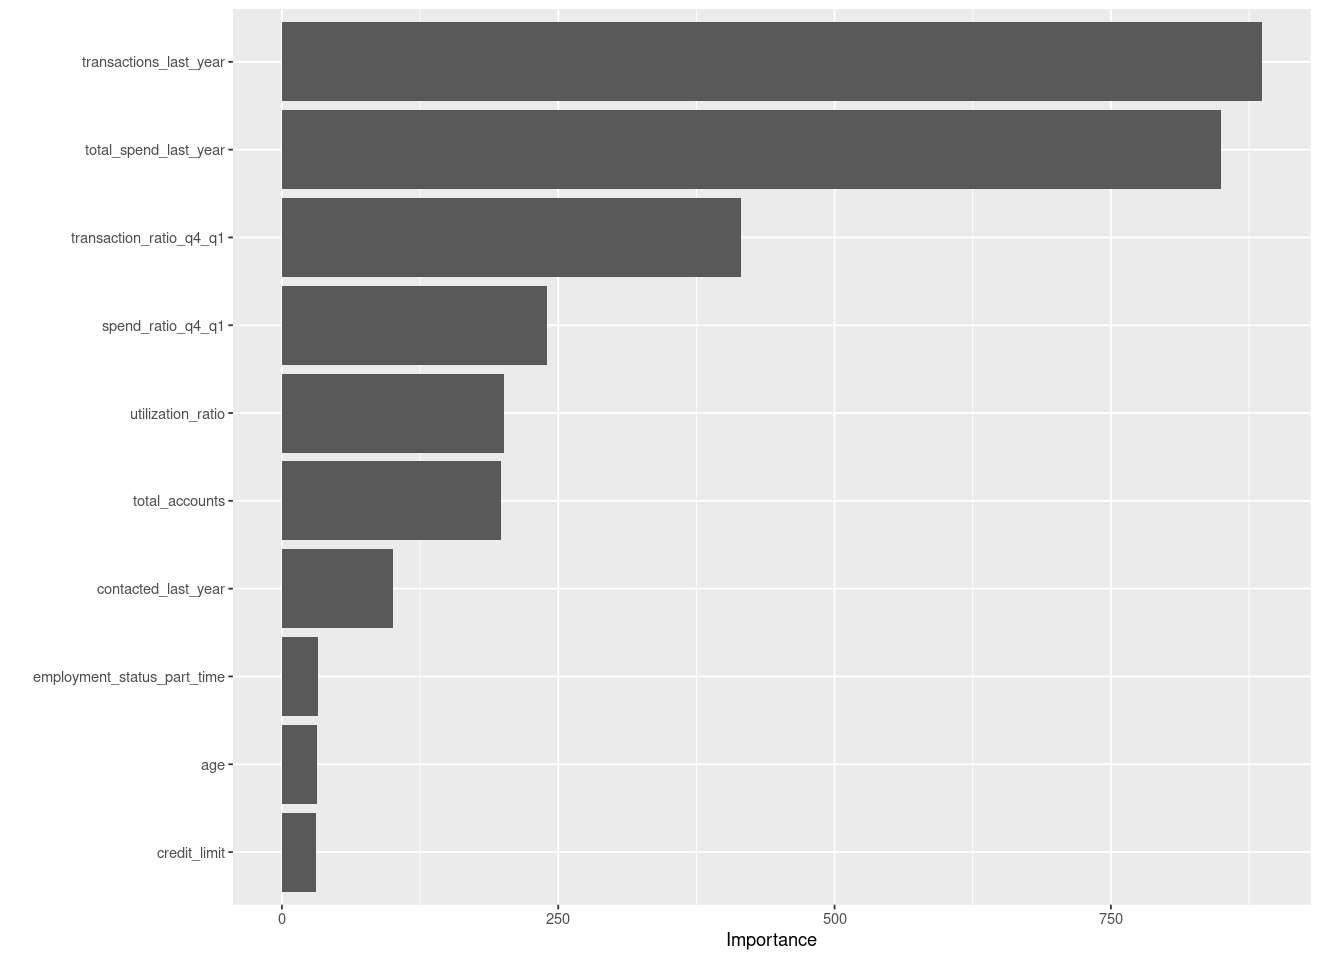

In [303]:
finaltreeWrkflw <- DtreeWorkflow %>%
	finalize_workflow(bestTree)
#fitting the model
decisionTreeWKFIT<- finaltreeWrkflw %>%
		fit(data = trainingCreditDf)
#Exploring the trained model
Dtfit<- decisionTreeWKFIT%>%
		extract_fit_parsnip()
options(repr.plot.width=11, repr.plot.height=8)
#variable significance
vip(Dtfit)

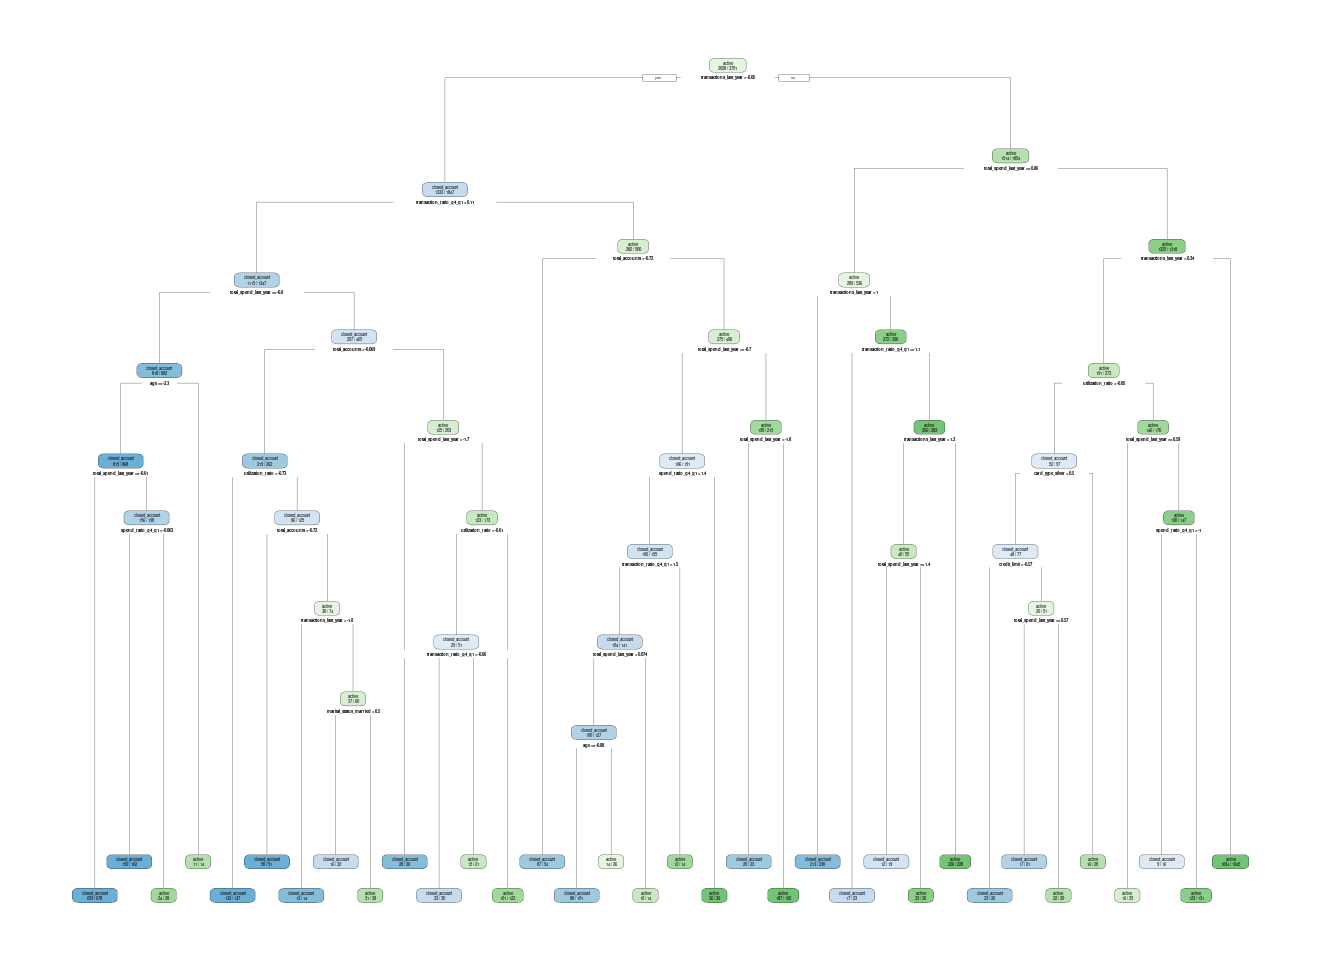

In [304]:
rpart.plot(Dtfit$fit, roundint = FALSE, extra = 2)

## Model 2 Performance Evaluation

In [305]:
decsionLastFit<- 
		finaltreeWrkflw%>%
last_fit(splitCreditDf)
decsionLastFit %>% collect_metrics()


.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.8909287,Preprocessor1_Model1
roc_auc,binary,0.9452557,Preprocessor1_Model1


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
f_meas,binary,0.8787515


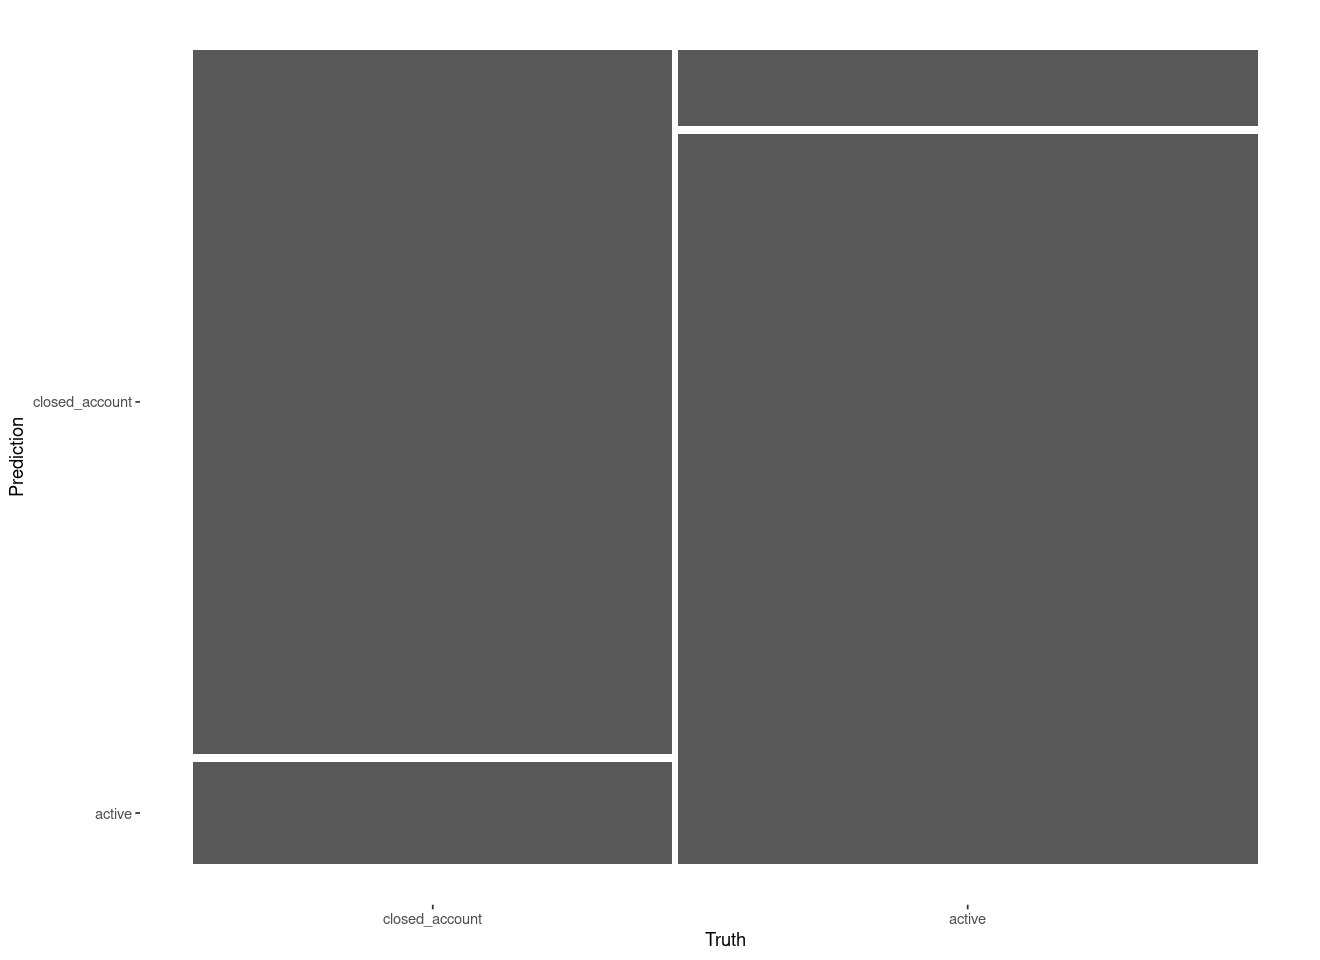

In [306]:
decisionTreePred<- decsionLastFit %>% collect_predictions()
conf_mat(decisionTreePred, truth = customer_status, estimate = .pred_class)%>%
autoplot(type = 'mosaic')
#f1 score
f_meas(decisionTreePred, truth = customer_status, estimate = .pred_class)


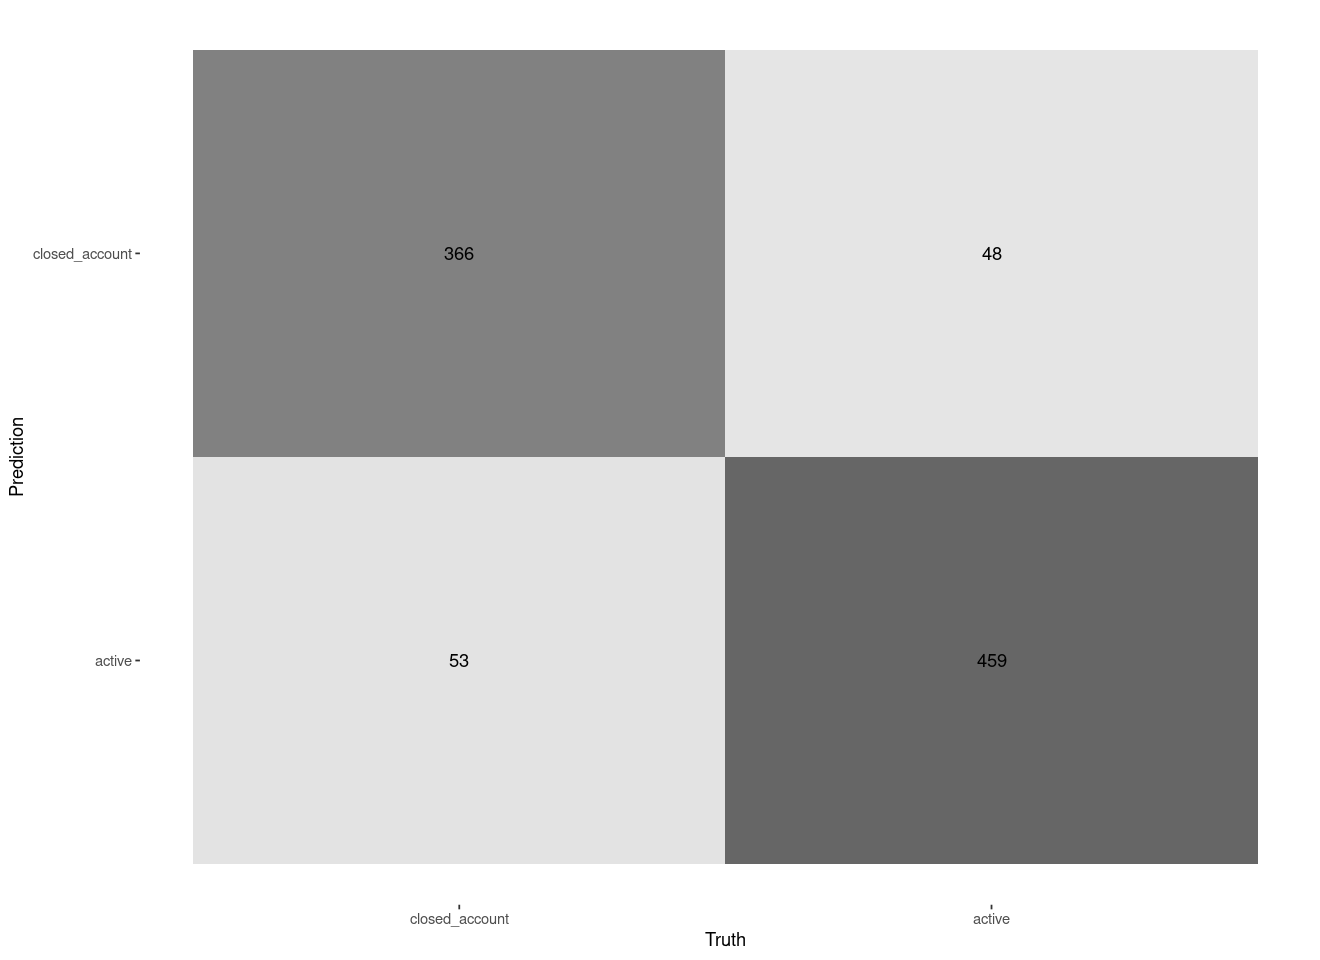

In [307]:
conf_mat(decisionTreePred, truth = customer_status, estimate = .pred_class)%>%
autoplot(type = 'heatmap')

## Model 3 Training

In [308]:
creditFolds<- vfold_cv(trainingCreditDf, v=5)
knnModel <- nearest_neighbor(neighbors = tune()) %>%
set_engine('kknn') %>%
set_mode('classification')
#creating a workflow
knnWrkflw <- workflow() %>%
add_model(knnModel) %>%
add_recipe(recipeCrdit)
k_grid <- tibble(neighbors = c(10, 20, 30, 50, 75, 100, 125, 150))
k_grid

neighbors
<dbl>
10
20
30
50
75
100
125
150


In [309]:
#tune workflow
set.seed(120)
knnTunning<- knnWrkflw %>%
tune_grid(resamples = creditFolds,
grid = k_grid)
knnTunning%>% show_best('roc_auc')

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
75,roc_auc,binary,0.9283336,5,0.004189811,Preprocessor1_Model5
50,roc_auc,binary,0.9281178,5,0.004322238,Preprocessor1_Model4
100,roc_auc,binary,0.9279212,5,0.004175988,Preprocessor1_Model6
125,roc_auc,binary,0.9272470,5,0.004137626,Preprocessor1_Model7
30,roc_auc,binary,0.9267963,5,0.004680247,Preprocessor1_Model3


In [310]:
## Select best model based on roc_auc
bestModelK <- knnTunning%>%
select_best(metric = 'roc_auc')
## View model
bestModelK

neighbors,.config
<dbl>,<chr>
75,Preprocessor1_Model5


In [311]:
#finalize the workflow
finalKNN <- knnWrkflw %>%
finalize_workflow(bestModelK)

## Model 3 Performance Evaluation

In [313]:
last_fit_knn <- finalKNN %>%
last_fit(split = splitCreditDf)
#performance estimation
last_fit_knn %>% collect_metrics()


.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.8488121,Preprocessor1_Model1
roc_auc,binary,0.9280338,Preprocessor1_Model1


In [314]:
knnPred <- last_fit_knn %>%
collect_predictions()
knnPred

id,.pred_closed_account,.pred_active,.row,.pred_class,customer_status,.config
<chr>,<dbl>,<dbl>,<int>,<fct>,<fct>,<chr>
train/test split,0.86749964,0.132500364,5,closed_account,closed_account,Preprocessor1_Model1
train/test split,0.22015434,0.779845665,11,active,active,Preprocessor1_Model1
train/test split,0.15437554,0.845624455,18,active,active,Preprocessor1_Model1
train/test split,0.10293421,0.897065789,23,active,active,Preprocessor1_Model1
train/test split,0.48453660,0.515463399,26,active,closed_account,Preprocessor1_Model1
train/test split,0.42130484,0.578695159,31,active,active,Preprocessor1_Model1
train/test split,0.81605802,0.183941981,44,closed_account,closed_account,Preprocessor1_Model1
train/test split,0.18585304,0.814146958,47,active,active,Preprocessor1_Model1
train/test split,0.12597037,0.874029626,51,active,active,Preprocessor1_Model1


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
f_meas,binary,0.8341232


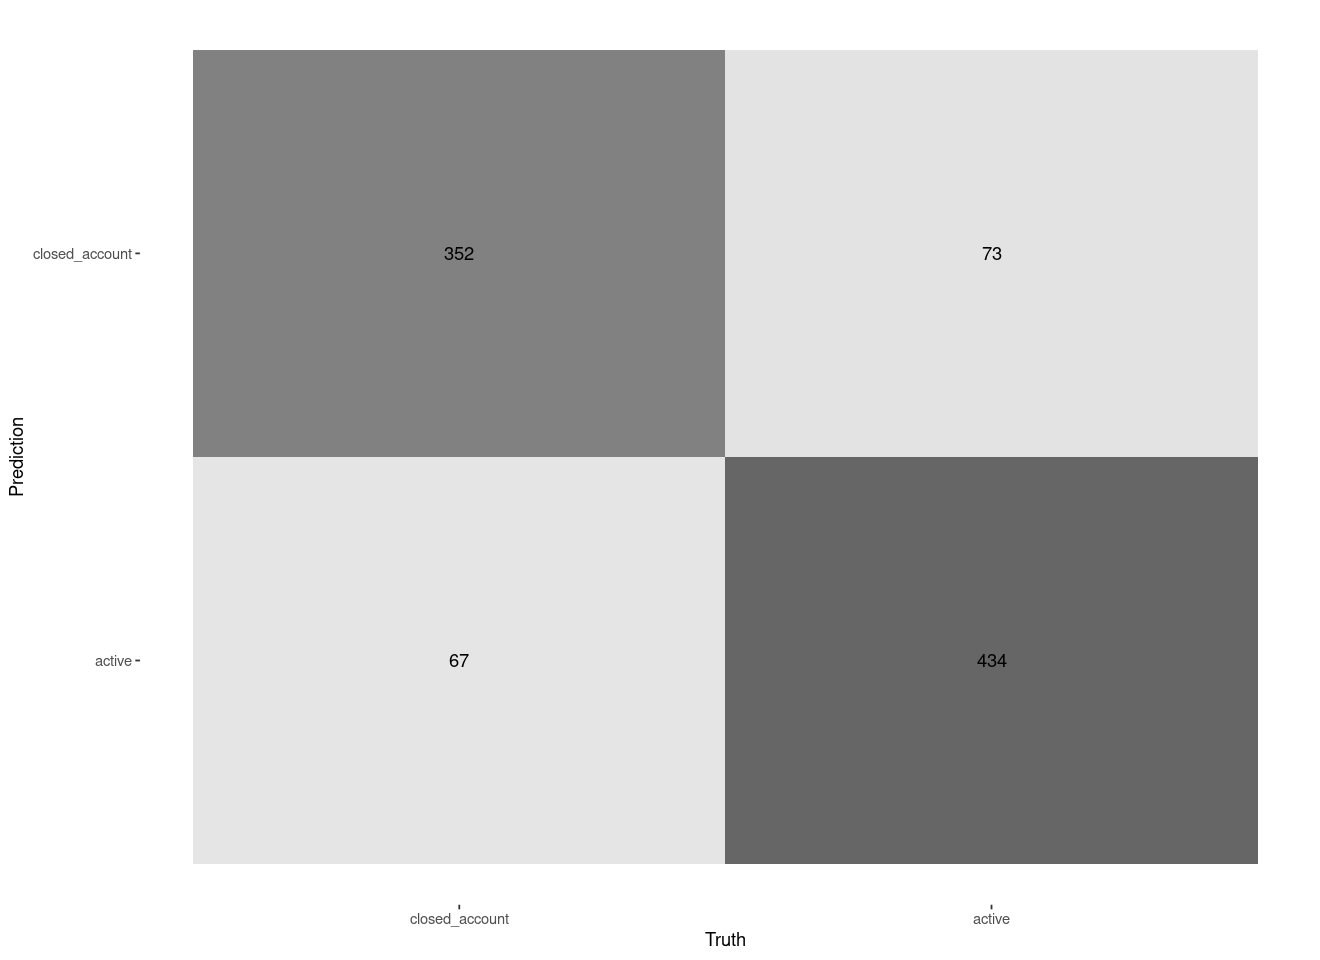

In [315]:
conf_mat(knnPred, truth = customer_status, estimate = .pred_class)%>%
autoplot(type = 'heatmap')
f_meas(knnPred, truth = customer_status, estimate = .pred_class)

# Executive Summary (25 Points)

Write an executive summary of your overall findings and recommendations to the executives at the bank. Think of this section as your closing remarks of a presentation, where you summarize your key findings, model performance, and make recommendations to improve customer retention and service at the ban

Your executive summary must be written in a [professional tone](https://www.universalclass.com/articles/writing/business-writing/appropriate-tone-in-business-communications.htm), with minimal grammatical errors, and should include the following sections:

1.  An introduction where you explain the business problem and goals of your data analysis

- What problem(s) is this company trying to solve? Why are they important to their future success?
- What was the goal of your analysis? What questions were you trying to answer and why do they matter?

2.  Highlights and key findings from your Exploratory Data Analysis section

- What were the interesting findings from your analysis and **why are they important for the business**?
- This section is meant to **establish the need for your recommendations** 
        in the following section

3. Your “best” classification model and an analysis of its performance 
	- In this section you should talk about the expected error of your model on future data
	 	- To estimate future performance, you can use your model performance results on the **test data**
    - You should discuss at least one performance metric, such as an F1, sensitivity, specificity, or ROC AUC for your model. However, you must explain the results in an **intuitive, non-technical manner**. Your audience in this case are executives at a telecommunications company with limited knowledge of machine learning.

4.  Your recommendations to the company

- Each recommendation must be supported by your data analysis results
- You must clearly explain **why** you are making each recommendation and which results from your data analysis support this recommendation
- You must also describe the potential business impact of your recommendation:
	- Why is this a good recommendation?
	- What benefits will the business achieve?

**Please add your executive summary in the text block below**

# Report to the bank:

## Introduction

In the competitive landscape of financial services, the bank has encountered a critical challenge: an increasing rate of credit card account closures, which directly impacts profitability and customer base stability. Understanding and addressing the factors leading to customer attrition is essential for maintaining a healthy business growth trajectory.
This study aims to understand the reasons why customers close their credit card accounts and investigates whether we can create precise predictive models to recognize customers at danger of cancellation. The bank seeks to reduce financial losses and sustain profitability by comprehending the underlying causes of account closures.


Purpose of Analysis:
Our analysis sought to unravel the determinants of credit card account closures, aiming to predict and preemptively address potential losses. The specific questions we addressed include:

1. The role of annual income in account closure.
2. The effect of credit card utilization on customer retention.
3. The impact of marital status on the likelihood of account closure.
4. The correlation between account inactivity and closure rates.
5. The influence of credit card type on account closure.

These questions are critical as they target the heart of customer engagement and retention strategies.




## Key Findings

Key Findings from Exploratory Data Analysis

The exploratory data analysis yielded several significant findings:

1. Income and Account Status: Median incomes were similar across closed and active accounts, but the 'closed_account' group had more high-income outliers, indicating possible account closures among more affluent customers.
2. Credit Utilization: A lower credit card utilization ratio was more common among customers who closed their accounts, suggesting that customers not leveraging their credit lines tend to disengage and eventually leave.
3. Marital Status: Divorced individuals had a higher proportion of account closures compared to single or married customers, indicating that marital transition periods could be critical for account retention.
4. Inactivity: A longer duration of inactivity was observed in closed accounts, which points to inactivity as a significant predictor of account closure risk.
5. Card Type: The type of credit card was related to closure rates, with blue cardholders showing a higher propensity to close accounts. Conversely, silver cardholders tended to keep their accounts active, and gold cardholders exhibited a balanced ratio of active to closed accounts.



## Modeling Results

I carried out an analysis using three distinct machine learning models—logistic regression, decision tree, and KNN—to anticipate the likelihood of customers discontinuing their credit card accounts. Each model was trained using a designated training dataset and then evaluated on a separate test set to determine its effectiveness in accurately predicting customer churn. The models were assessed based on several metrics, including accuracy, precision, recall, and F1 score. The F1 score, a balanced measure of a model's precision and recall, was deemed the most critical metric for our evaluation. The logistic regression and KNN models both achieved an F1 score of approximately 85%, whereas the decision tree model surpassed them with a 90% F1 score. When examining accuracy, the logistic regression model displayed 85% accuracy with 789 correct predictions of both positive and negative classes. The decision tree model demonstrated a higher accuracy of 90%, with 1246 correct predictions, and the KNN model showed a comparable accuracy to logistic regression at 85%, with 1179 correct predictions.

## Recommendations

To address these insights, we recommend the following strategies:

1. Engagement with High-Income Customers: Implement personalized engagement and loyalty programs for higher-income customers to prevent attrition.
2. Utilization Incentives: Develop rewards for consistent card usage, especially for customers with low utilization, to enhance perceived value and stickiness.
3. Support During Life Transitions: Offer tailored financial advice and support programs for customers experiencing significant life events, such as divorce.
4. Inactivity Monitoring: Proactively monitor inactivity and initiate retention campaigns before customers become completely disengaged.
5. Reassess Card Offerings: Re-evaluate the rewards and benefits of different card types, particularly the blue card, to enhance satisfaction and reduce closure rates.

By implementing these data-driven recommendations, the bank can better align its offerings with customer needs, reduce account closures, and ultimately improve its competitive position and financial health.